# Pipelines

In [1]:
import numpy as np
import pandas as pd

from sklearn import datasets

In [2]:
iris = datasets.load_iris()

After data cleaning, the first step is usually defining the features and the label/target:

In [3]:
X = iris.data
y = iris.target

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=666)

There are only 2 lines of code that are classifier-specific:

In [12]:
from sklearn import tree
tree_classifier = tree.DecisionTreeClassifier()

Training the classifier is then a separate step:

In [13]:
tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

And making predictions is another:

In [14]:
predictions = tree_classifier.predict(X_test)

In [16]:
print(predictions)

[1 2 1 2 0 1 1 2 1 1 1 0 0 0 2 1 0 2 2 2 1 0 2 0 1 1 0 1 2 2 0 0 1 2 1 1 2
 2 0 1 2 2 1 1 0 0 0 0 1 0 0 2 1 1 1 0 0 2 2 1]


In [17]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, predictions))

1.0


By replacing the 2 lines where we define the classirier function, the same task can be repeated without changing any other lines of code in the steps above.

In [18]:
from sklearn import datasets
iris = datasets.load_iris()

X = iris.data
y = iris.target

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=666)

# setting a different classifier for the task
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier()

knn_classifier.fit(X_train, y_train)

predictions = tree_classifier.predict(X_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, predictions))

1.0


A classification can be interpretted as a function where the features are the input arguments, and the label/target is the output result of the function:

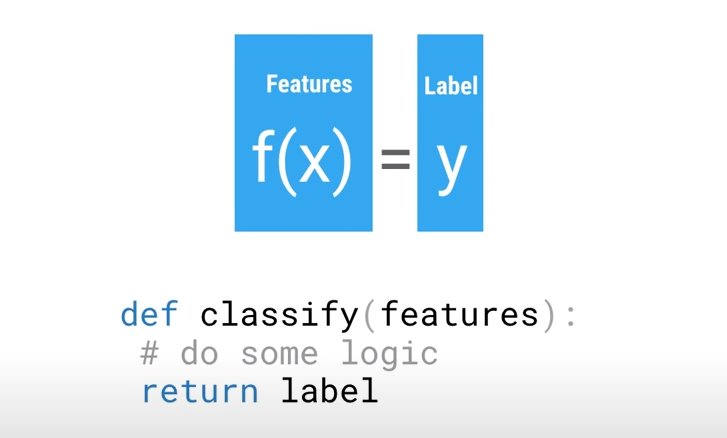

# Writing a Classifier Recipe
We extract the one step where we set the classifier of the pipeline. But when the import line is removed, it breaks the script.

So we create a class for the classifier and we change the pipeline to use it.

Also, there are 2 components that are relevant from the pipeline's interface's point of view: `fit` (which does the training) and `predict` (which does the prediction). So we define methods for these in the class.

In [28]:
# a scrappy, barebones classifier
class ScrappyKNN():
    def fit(self, X_train, y_train):
        pass
    
    def predict(self, X_test):
        pass
    

# the rest is the actual pipeline:
from sklearn import datasets
iris = datasets.load_iris()

X = iris.data
y = iris.target

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=666)

# setting a different classifier for the task
#from sklearn.neighbors import KNeighborsClassifier
our_classifier = ScrappyKNN() # <--- here will be our classifier

our_classifier.fit(X_train, y_train)

predictions = our_classifier.predict(X_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, predictions))

0.9833333333333333


First we can implement a random classifier, which just guesses the label:

In [29]:
import random

class ScrappyKNN():
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
    
    def predict(self, X_test):
        # since X_test is a 2D array (a matrix), predictions should be a vector
        # each row contains the features for 1 test example
        predictions = []
        for row in X_test:
            label = random.choice(self.y_train)
            predictions.append(label)
        
        return predictions
    
def run_pipeline():
    from sklearn import datasets
    iris = datasets.load_iris()

    X = iris.data
    y = iris.target

    from sklearn.model_selection import train_test_split

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=666)

    # setting a different classifier for the task
    #from sklearn.neighbors import KNeighborsClassifier
    our_classifier = ScrappyKNN() # <--- here will be our classifier

    our_classifier.fit(X_train, y_train)

    predictions = our_classifier.predict(X_test)

    from sklearn.metrics import accuracy_score
    print(accuracy_score(y_test, predictions))
    
run_pipeline()

0.3


Since there are 3 different kind of irises in the dataset, the 0.3 accuracy is expected.

And since now we know the interface for the classifier, we can implement our classifier. We need a function to calculate distance between spatial points:

In [30]:
from scipy.spatial import distance

def euc(a, b):
    return distance.euclidean(a, b)

And now let's see an algorithm for a classifier:

In [31]:
# this example hard-codes K to 1, so it'll be a nearest neighbour classifier
class ScrappyKNN():
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
    
    def predict(self, X_test):
        predictions = []
        for row in X_test:
            label = self.closest(row)
            predictions.append(label)
        
        return predictions
    
    def closest(self, row):
        best_dist = euc(row, self.X_train[0])
        best_index = 0
        
        for i in range(1, len(self.X_train)):
            dist = euc(row, self.X_train[i])
            if dist < best_dist:
                best_dist = dist
                best_index = i
                
        return self.y_train[best_index]

Running the pipeline with this newly defined classifier:

In [32]:
run_pipeline()

0.9833333333333333


Over 90% accuracy is a good start.

# ScikitLearn's Pipelines
Sklearn's pipelines come in handy because generally a pipeline recipe involves a lot of other steps as well (i.e. data cleansing/imputing, feature engineering, data scaling, etc.)

In order to write a proper recipe pipeline and have a clean code, using sklearn's pipelines is advised. 

In [35]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [36]:
iris_df = load_iris()

In [37]:
X_train, X_test, y_train, y_test = train_test_split(iris_df.data, iris_df.target, test_size=0.33, random_state=666)

#### Steps for creating a Pipeline
1. Data preprocessing by using Standard Scaler
2. Reduce dimensions using PCA
3. Apply classifier

The pipeline's constructor takes in a list of tuples that represent the steps: A description of the step, and the actual function of the step to execute:

In [38]:
pipeline_lr = Pipeline([('scalar1', StandardScaler()),
                        ('pca1', PCA(n_components=2)),
                        ('lr_classifier', LogisticRegression(random_state=666))])

In [39]:
pipeline_dt = Pipeline([('scalar2', StandardScaler()),
                        ('pca2', PCA(n_components=2)),
                        ('dt_classifier', DecisionTreeClassifier())])

In [40]:
pipeline_rf = Pipeline([('scalar3', StandardScaler()),
                        ('pca3', PCA(n_components=2)),
                        ('rf_classifier', RandomForestClassifier())])

The first N-1 steps in the lists of the pipelines above (where N = number of steps in a pipeline) will call `fit` and `transform`, and then the last step will always call the `predict` function.

Let's create a list of pipelines:

In [41]:
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf]

And let's see which pipeline performs the best:

In [43]:
best_accuracy = 0.0
best_classifier = 0
best_pipeline = ""

# a dictionary of pipelines and classifiers for ease of recerence
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'Random Forest'}

# fit the pipelines
for pipeline in pipelines:
    pipeline.fit(X_train, y_train)
    
for i, model in enumerate(pipelines):
    print("{} test accuracy: {}".format(pipe_dict[i], model.score(X_test, y_test)))
    
for i, model in enumerate(pipelines):
    score = model.score(X_test, y_test)
    if score > best_accuracy:
        best_accuracy = score
        best_pipeline = model
        best_classifier = i

print("Classifier with the best accuracy: {}".format(pipe_dict[best_classifier]))

Logistic Regression test accuracy: 0.96
Decision Tree test accuracy: 0.98
Random Forest test accuracy: 0.98
Classifier with the best accuracy: Decision Tree


## Sources and references
About pipelines and recipes in general:

https://youtu.be/84gqSbLcBFE

https://youtu.be/AoeEHqVSNOw


How to use sklearn's pipelines:

https://www.youtube.com/watch?v=w9IGkBfOoic